<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L06/CVaR_3_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1 : import library
import pandas as pd
# Step 2 : import data
wine_quality = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/Wine.csv')
wine_quality.head()
names_inputs = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',  'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',  'od280', 'proline']

Mean Squared Error: 0.6474073096998934
R-squared: 0.011359379442903772


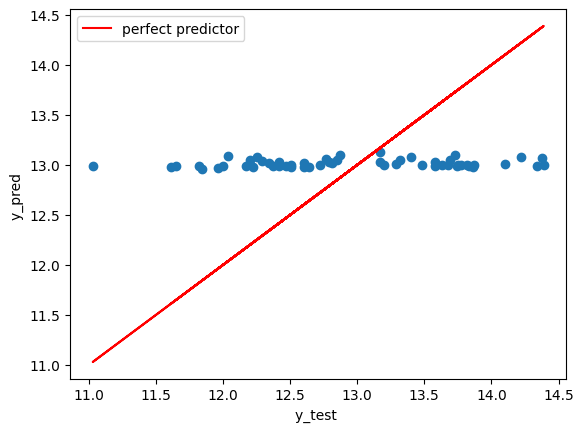

In [ ]:
# Step 3: Select features
y = wine_quality['alcohol']
X = wine_quality[['malic_acid']]  # prdict alchool content only using malic_acid....

# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Step 6 : train or fit model
model.fit(X_train, y_train)

# Step 7 : predict model
y_pred_model_1 = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_model_1)
r2 = r2_score(y_test, y_pred_model_1)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Step 7 : plot results of the model
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_model_1)
plt.plot(y_test, y_test, c='r', label='perfect predictor')
plt.xlabel('y_test ')
plt.ylabel('y_pred ')
plt.legend()
plt.show()


Mean Squared Error: 0.43259359024821675
R-squared: 0.33939640608897237


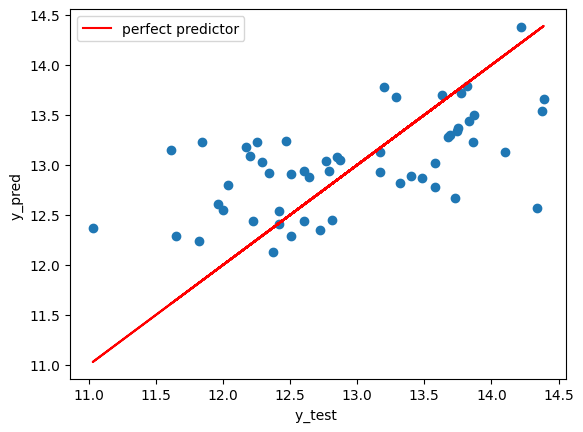

In [ ]:
X = wine_quality[['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']]  # Repeat the same analysis but adding more input features (hopefully better predictions)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_model_2 = model.predict(X_test)   # predictions of our 2nd model
mse = mean_squared_error(y_test, y_pred_model_2)
r2 = r2_score(y_test, y_pred_model_2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_model_2)
plt.plot(y_test, y_test, c='r', label='perfect predictor')
plt.xlabel('y_test ')
plt.ylabel('y_pred ')
plt.legend()
plt.show()



Mean Squared Error: 0.280908646609864
R-squared: 0.5710309498467565


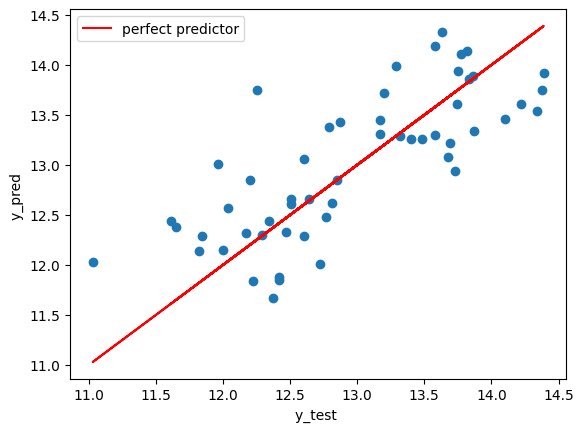

In [ ]:
X = wine_quality[names_inputs]  # Add all the features
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_model_3 = model.predict(X_test)  # predictions of our 3rd model
mse = mean_squared_error(y_test, y_pred_model_3)
r2 = r2_score(y_test, y_pred_model_3)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_model_3)
plt.plot(y_test, y_test, c='r', label='perfect predictor')
plt.xlabel('y_test ')
plt.ylabel('y_pred ')
plt.legend()
plt.show()


In [ ]:
errors_1 = abs(y_pred_model_1-y_test)
errors_2 = abs(y_pred_model_2-y_test)
errors_3 = abs(y_pred_model_3-y_test)

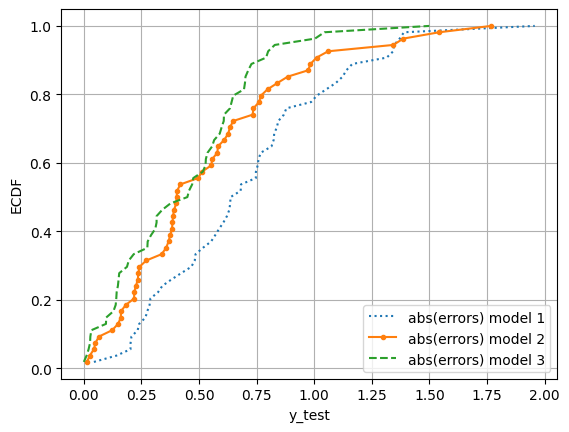

In [ ]:
import numpy as np

def ecdf(data):
  """Compute ECDF for a one-dimensional array of data."""
  # Number of data points: n
  n = len(data)
  # x-data for the ECDF: x
  x = np.sort(data)
  # y-data for the ECDF: y
  y = np.arange(1, n+1) / n
  return x, y

x_ecdf, y_ecdf = ecdf(errors_1)
plt.plot(x_ecdf, y_ecdf, ':', label='abs(errors) model 1')
x_ecdf, y_ecdf = ecdf(errors_2)
plt.plot(x_ecdf, y_ecdf, '.-', label='abs(errors) model 2')
x_ecdf, y_ecdf = ecdf(errors_3)
plt.plot(x_ecdf, y_ecdf, '--', label='abs(errors) model 3')
plt.xlabel('y_test')
plt.ylabel('ECDF')
plt.grid()
plt.legend()
plt.show()

In [ ]:
def estimate_cvar_and_var(errors, probability_threshold):
  """Estimates Conditional Value at Risk (CVaR) and Value at Risk (VaR).

  Args:
    errors: A numpy array of prediction errors.
    probability_threshold: The desired probability threshold (e.g., 0.95 for 95%).

  Returns:
    A tuple containing the estimated CVaR and VaR.
  """
  var = errors.quantile(probability_threshold)
  cvar = np.mean(errors[errors>=var]) # right-tails
  return cvar, var


# Calculate CVaR and VaR for the three cases with a plevel% probability threshold
plevel= 0.8
cvar_1, var_1 = estimate_cvar_and_var(errors_1, plevel)
cvar_2, var_2 = estimate_cvar_and_var(errors_2, plevel)
cvar_3, var_3 = estimate_cvar_and_var(errors_3, plevel)


print(f"Model 1: Conditional VaR = {cvar_1:.4f}, Value at Risk = {var_1:.4f} probability level {plevel}")
print(f"Model 2: Conditional VaR = {cvar_2:.4f}, Value at Risk =  {var_2:.4f} probability level {plevel}")
print(f"Model 3: Conditional VaR = {cvar_3:.4f}, Value at Risk =  {var_3:.4f} probability level {plevel}")


Model 1: Conditional VaR = 1.2996, Value at Risk = 1.0275 probability level 0.8
Model 2: Conditional VaR = 1.1447, Value at Risk =  0.7802 probability level 0.8
Model 3: Conditional VaR = 0.8642, Value at Risk =  0.6674 probability level 0.8
